# Method 2
Using Omega representation

# OMEGA REPRESENTATION

**Omega representation**: This is based on the claim that a word can be represented in terms of count of 11 primitve shapes present in various segments of image. The 11 shapes are: *ascender, descender, left small semi-circle, right small semi-circle, left large semi-circle, right large semi-circle, circle, vertical line, diagonal line, diagonal line at a slope of 135 degrees, and horizontal line*. These have been shown in figure.

![Primary Shapes](https://drive.google.com/uc?export=view&id=1573VBQwD03ae_UBjDaYk4fq84bGmDzr2)

The word is split into equal parts at various levels.

At level *i*:  
* A word is split into *i* (nearly) equal segments.  
* For every segment, we compute a vector in which each segment correspond to count of a shape.

![Omega for anagram](https://drive.google.com/uc?export=view&id=1nk1pj0yp5wunCxYeUp5ppH8hdsHF41rv)


*  Individual vectors of each segment are concatenated after one another, i.e. the level vector is obtained by concatenating individual vectors of first segment followed by second, third and so on.

The final vector is obtained by concatenating vectors of all levels $\{L_i.L_{i+1}.L_{i+2}\cdots\}$.

*we are using levels 1-5. 
This makes the length of final Omega vector to be (1+2+3+4+5) * 11 = 165*


In [6]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
import pandas

In [7]:
IMG_HEIGHT = 50
IMG_WIDTH = 250

# Dataset

The dataset used here is a synthetic word recognition dataset. It consists of images of lowercase English words, generated with handwritten-fonts. All images are single channel (grayscale) and have size 250 * 50. <br>

The dataset has the following directory structure:

<pre>
<b>WR-Dataset</b>
|__ <b>train</b>: [foo_1.png, bar_2.png, sample_3.png ....]
|__ <b>validation</b>: [foo_221.png, bar_322.png, sample_353.png ....]
|__ <b>test</b>: [bar_521.png, foo_272.png, example_433.png ....]
|__ <b>Alphabet.csv</b>
    
</pre>
Number of images in train,test and validate folder is 2052, 400 and 108 respectivly . 

In [8]:
#Add the paths for train, validation and test directories

train_dir_path="C:/Users/hp/Desktop/PROJECT/Word_Recognition/WR-Dataset/Train"
validation_dir_path="C:/Users/hp/Desktop/PROJECT/Word_Recognition/WR-Dataset/Validation"
test_dir_path="C:/Users/hp/Desktop/PROJECT/Word_Recognition/WR-Dataset/Test"

## Visualizing sample images

Prepare an image to label map and visualize 5 randomly chosen images from training, validation and test sets (along with their labels). Also, Mention the number of word classes present in each of the three sets.


In [9]:
def get_classes_count(df):
    l = list(df['label'])
    map = {}
    for i in l:
        map[i] = 0
    return len(map)

In [10]:
def visualize_image(img):
    # Insert your code here to visualize a given image
    %pylab inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    img = mpimg.imread(img)
    imgplot = plt.imshow(img)
    plt.show()

In [11]:
def get_dataframe(folder_name):
    import glob
    images_fullpath = glob.glob(folder_name + '/*')
    images = []
    for image in images_fullpath:
        images.append(os.path.basename(image))
    labels = []
    for image in images:
        labels.append(image.split("_")[0])
    data = np.column_stack((images,labels))
    df = pandas.DataFrame(data = data, columns = ['Image','label']) 
    return df

,Image,label
0,about_2.png,about
1,address_0.png,address
2,address_2.png,address
3,address_4.png,address
4,after_6.png,after
...,...,...
395,w_5.png,w
396,x_5.png,x
397,years_5.png,years
398,year_3.png,year


,Image,label
0,about_0.png,about
1,about_1.png,about
2,about_4.png,about
3,about_5.png,about
4,about_6.png,about
...,...,...
2047,you_3.png,you
2048,you_4.png,you
2049,you_5.png,you
2050,you_6.png,you


,Image,label
0,about_3.png,about
1,address_5.png,address
2,address_7.png,address
3,add_2.png,add
4,all_2.png,all
...,...,...
103,user_2.png,user
104,very_5.png,very
105,way_6.png,way
106,website_1.png,website


Number of classes in Train set :  300
Images from Train Dataset
Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


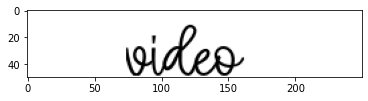

Populating the interactive namespace from numpy and matplotlib


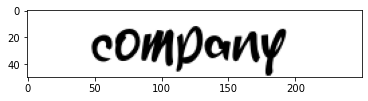

Populating the interactive namespace from numpy and matplotlib


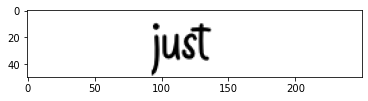

Populating the interactive namespace from numpy and matplotlib


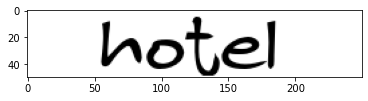

Populating the interactive namespace from numpy and matplotlib


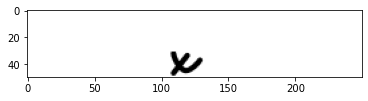

Number of classes in Validation set :  86
Images from Validation Dataset
Populating the interactive namespace from numpy and matplotlib


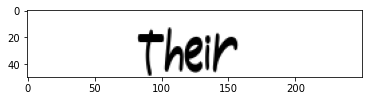

Populating the interactive namespace from numpy and matplotlib


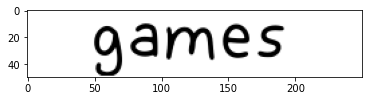

Populating the interactive namespace from numpy and matplotlib


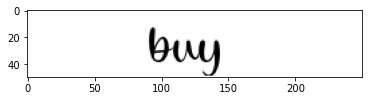

Populating the interactive namespace from numpy and matplotlib


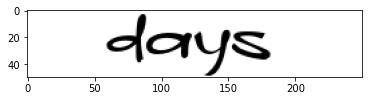

Populating the interactive namespace from numpy and matplotlib


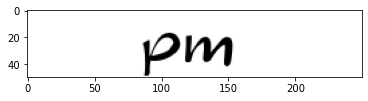

Number of classes in Test set :  198
Images from Test Dataset
Populating the interactive namespace from numpy and matplotlib


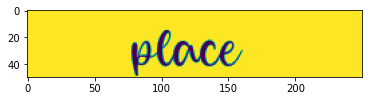

Populating the interactive namespace from numpy and matplotlib


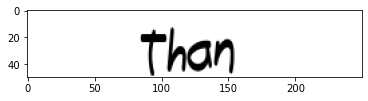

Populating the interactive namespace from numpy and matplotlib


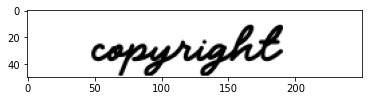

Populating the interactive namespace from numpy and matplotlib


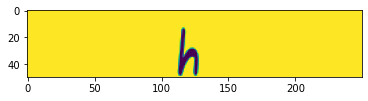

Populating the interactive namespace from numpy and matplotlib


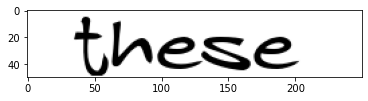

In [12]:
#code to build a dataframe with Images and their corresponding labels for 3 folders (similar to Lab 3(a))
test_df = get_dataframe(test_dir_path)
train_df = get_dataframe(train_dir_path)
validation_df = get_dataframe(validation_dir_path)

# display the dataframes
display(test_df)
display(train_df)
display(validation_df)

# Visualise images from the train set
print("Number of classes in Train set : ", get_classes_count(train_df))
print("Images from Train Dataset")
for i in range(5):
    visualize_image(train_dir_path + '/'+ random.choice(train_df['Image']))
# Visualise images from the validation set
print("Number of classes in Validation set : ", get_classes_count(validation_df))
print("Images from Validation Dataset")
for i in range(5):
    visualize_image(validation_dir_path + '/'+ random.choice(validation_df['Image']))

# Visualise images from the test set
print("Number of classes in Test set : ", get_classes_count(test_df))
print("Images from Test Dataset")
for i in range(5):
    visualize_image(test_dir_path + '/'+ random.choice(test_df['Image']))

# modules that can give  vector representations for the input words.

In [13]:
def get_Vector(levels,word):
    l = []
    left = len(word)
    pos = 0
    while left:
        temp = left // levels
        l.append(word[pos:pos+temp])
        pos += temp
        left -= temp
        levels -= 1
    return l

In [17]:
def get_Omega_vector(word):
  #Insert the code for a function that returns Omega representation of the input word
    columns = ['label','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11']
    df = pandas.read_csv("C:/Users/hp/Desktop/PROJECT/Word_Recognition/WR-Dataset/Alphabet.csv",names = columns).to_numpy()
    l = []
    for i in range(1,6):
        temp = get_Vector(i,word)
        l2 = []
        for str in temp:
            l3 = [0 for i in range(11)]
            for c in str:
                values =  df[ord('c') - ord('a')]
                for j in range(1,12):
                    l3[j-1] += values[j]
            l2.extend(l3)
        l.extend(l2)
    return l
  #Hint: For computing count of segments, you can add count of shapes for individual characters (already provided in Alphabet.csv file)
  

In [18]:
name ="Akash"

print("Omega vector:",get_Omega_vector(name))

Omega vector: [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


# Building Omega model architecture 

Following is the architecture of the model that will learn Omega representation:

Input shape: 250 * 50 ( RGB )

* 2 Convolution layers with 64  filters
* A Max Pool layer with pool size 2 * 2   
* 2 Convolution layers with 128  filters
* A Max Pool layer with pool size 2 * 2    
* 6 Convolution layers with 256  filters
* 3 Convolution layers with 512  filters
* GLobal Average Pooling layer
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 165 units (Output)

For all convolution layers, keep kernel size as 3 * 3, use ReLu activation 

For all max pool layers, keep stride as 2

For all dense layers, use ReLu activation.

**Loss function**: Mean-squared error

**Similarity Metric**: Cosine Similarity

In [19]:
#code for function that returns a model which will predict Omega representation

def Omega_model(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    s = 2
    # Add Layers
    model.add(tf.keras.layers.Conv2D(strides = s,filters = 64, kernel_size = (3,3), activation='relu' ,input_shape=(IMG_HEIGHT,IMG_WIDTH, 3), padding = 'same'))
    model.add(tf.keras.layers.Conv2D(strides = s,filters = 64, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
    model.add(tf.keras.layers.Conv2D(strides = s,filters = 128, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(tf.keras.layers.Conv2D(strides = s,filters = 128, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
    for i in range(6):
        model.add(tf.keras.layers.Conv2D(strides = s,filters = 256, kernel_size = (3,3), activation='relu', padding = 'same'))
    for i in range(3):
        model.add(tf.keras.layers.Conv2D(strides = s,filters = 512, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(165, activation='relu'))
    
    # Define optimizers (Adam Optimizer), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss =  tf.keras.losses.MeanSquaredError()    
    m = [tf.keras.metrics.CosineSimilarity()]
    
    # Compile the model
    model.compile(optimizer=opt, loss=loss, metrics=m)
    
    # return model
    return model


we are using MSE as loss function for final layer in Omega Model because MSE is a good loss function in cases when the error could be positive and negative.
We are using ReLu as activation function because The output of the Omega model is a vector which contains digits thus ReLu is a good choice here 
moreover ReLu does not have vanishing gradient problem 

## Seen and Unseen Words

Words whose images hase been seen by the model during training are termed as seen words, while those which are part of the test set but not seen during training are called unseen words.

In [20]:
#Insert code to print seen word classes 
dict_seen = {}
for label in train_df['label']:
    dict_seen[label] = 1
print("Seen words : " , list(dict_seen.keys()))

#Insert code to print unseen word classes from test set
dict_unseen = {}
for label in test_df['label']:
    dict_unseen[label] = 1
print("\nUnseen words : ", list(dict_unseen.keys()))

Seen words :  ['about', 'address', 'add', 'after', 'all', 'also', 'am', 'and', 'any', 'an', 'area', 'are', 'as', 'at', 'available', 'a', 'back', 'based', 'because', 'been', 'before', 'being', 'best', 'between', 'be', 'black', 'books', 'book', 'both', 'business', 'but', 'buy', 'by', 'b', 'can', 'car', 'case', 'center', 'check', 'city', 'click', 'code', 'comments', 'community', 'company', 'contact', 'copyright', 'could', 'c', 'data', 'date', 'days', 'day', 'design', 'details', 'development', 'de', 'did', 'does', 'do', 'dvd', 'd', 'each', 'ebay', 'education', 'email', 'even', 'e', 'family', 'file', 'find', 'first', 'forum', 'for', 'found', 'free', 'from', 'full', 'f', 'games', 'general', 'get', 'good', 'go', 'great', 'group', 'g', 'had', 'has', 'have', 'health', 'help', 'here', 'her', 'he', 'high', 'his', 'home', 'hotels', 'hotel', 'house', 'how', 'if', 'index', 'information', 'info', 'international', 'internet', 'into', 'in', 'is', 'items', 'item', 'its', 'it', 'i', 'january', 'jan', 'ju

In [21]:
NUM_EPOCHS=10
BATCH_SIZE=8

# Tuning Hyperparameters for Omega Model

We will now tune the *learning rate* for the Omega Model. 
For that, load the train and validation data (images and their labels, i.e. Omega vectors) 

In [23]:
#code for loading train and validation set images and their corresponding labels 
Ox_train, Oy_train = [], []
for i,row in train_df.iterrows():
    image = tf.keras.preprocessing.image.load_img(train_dir_path + '/' + row['Image'], target_size = (IMG_HEIGHT, IMG_WIDTH))
    Ox_train.append(tf.keras.preprocessing.image.img_to_array(image))
    Oy_train.append(get_Omega_vector(row['label']))
Ox_train = np.asarray(Ox_train)
Oy_train = np.asarray(Oy_train)

Ox_validate, Oy_validate = [], []
for i,row in validation_df.iterrows():
    image = tf.keras.preprocessing.image.load_img(validation_dir_path + '/' + row['Image'], target_size = (IMG_HEIGHT, IMG_WIDTH))
    Ox_validate.append(tf.keras.preprocessing.image.img_to_array(image))
    Oy_validate.append(get_Omega_vector(row['label']))
Ox_validate = np.asarray(Ox_validate) 
Oy_validate = np.asarray(Oy_validate)

# Now find the best LR for the Omega model.



In [24]:
def determine_Omega_lr():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_similarity = []
    

    for l_rate in learning_rates:
        
        # code to build a model with the current learning rate
        model = Omega_model(l_rate)
        
        # code here to train the model using the training set and validate using the validation set
        hist = model.fit(
          x=Ox_train,y = Oy_train,epochs = NUM_EPOCHS,batch_size = BATCH_SIZE,
          validation_data=(Ox_validate, Oy_validate)).history
        
        # code to find the average validation accuracy for this model setting and append it to the maintained list
        temp = np.mean(hist['val_cosine_similarity'])
        avg_val_similarity.append(temp)

    # code to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    pos = np.argmax(avg_val_similarity)
    print("Learning Rate which gives highest validation accuracy : ", learning_rates[pos])
    return learning_rates[pos]

# determine_best_learning_rate() is being called here
best_Omega_lr = determine_Omega_lr()

Epoch 1/10
257/257 [==============================] - 101s 384ms/step - loss: 0.1351 - cosine_similarity: 0.9349 - val_loss: 0.0491 - val_cosine_similarity: 0.9606
Epoch 2/10
 93/257 [=========>....................] - ETA: 1:01 - loss: 0.0366 - cosine_similarity: 0.9727

KeyboardInterrupt: 

# Model building and training using callbacks

---
Now build and summarize the Omega model as per the best learning rate value determined earlier.


In [ ]:
# Insert code for building model using the best LR determined
model = Omega_model(best_Omega_lr)
print(model.summary())

Now instantiate the four callbacks which you have described above.

In [ ]:
# EarlyStopping after validation loss has not improved for 5 epochs 
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

# ReduceLROnPlateau reducing LR by half when validation loss has not improved for 3 epochs. 
reduce_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# CSVlogger for keeping logs in filename of your choice
csv_logger = tf.keras.callbacks.CSVLogger('C:/Users/Ravi/Desktop/ML assignment 3/WR-Dataset/training.csv')

# ModelCheckpoint that saves the best weights of model after every 10 epochs
checkpoint_filepath_omega = 'C:/Users/Ravi/Desktop/ML assignment 3/WR-Dataset/checkpoints/cp.ckpt'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath_omega, save_best_only=True)

# Make a list of all the callbacks
callbacks = [earlystop_callback, reduce_callback, csv_logger, model_checkpoint_callback]


# Now train the model using these callbacks for the loaded training word images.

In [ ]:
# Insert code to train with callbacks (2 points)
Ox_train, Oy_train = [], []
for i,row in train_df.iterrows():
    image = tf.keras.preprocessing.image.load_img(train_dir_path + '/' + row['Image'], target_size = (IMG_HEIGHT, IMG_WIDTH,3))
    Ox_train.append(tf.keras.preprocessing.image.img_to_array(image))
    Oy_train.append(get_Omega_vector(row['label']))
Ox_train = np.asarray(Ox_train)
Oy_train = np.asarray(Oy_train)

Ox_validate, Oy_validate = [], []
for i,row in validation_df.iterrows():
    image = tf.keras.preprocessing.image.load_img(validation_dir_path + '/' + row['Image'], target_size = (IMG_HEIGHT, IMG_WIDTH,3))
    Ox_validate.append(tf.keras.preprocessing.image.img_to_array(image))
    Oy_validate.append(get_Omega_vector(row['label']))
Ox_validate = np.asarray(Ox_validate) 
Oy_validate = np.asarray(Oy_validate)

hist = model.fit(
          x=Ox_train,y = Oy_train,epochs = 10,batch_size = BATCH_SIZE,
          validation_data=(Ox_validate, Oy_validate), callbacks = callbacks).history
print(hist)


# Insert your code here to obtain the lists: epochs, training similarity, validation similarity, training loss, validation loss from CSV log file (1 point)
log_file = pandas.read_csv("C:/Users/Ravi/Desktop/ML assignment 3/WR-Dataset/training.csv")
train_similarity = list(log_file['cosine_similarity'])
valid_similarity = list(log_file['val_cosine_similarity'])
train_loss = list(log_file['loss'])
valid_loss = list(log_file['val_loss'])
epochs = [i for i in range(1,11)]

# Insert your code here to plot Epochs Vs. training and validation accuracy (2 points)
fig, ax = plt.subplots(nrows=2, figsize = (20,20))
data1 = list(zip(epochs,train_similarity, valid_similarity))
data1 = pandas.DataFrame(data = data1, columns = ['epochs', 'Training Accuracy', 'Validation Accuracy'])
data1 = pandas.melt(data1, id_vars = "epochs")
sns.barplot(x="epochs", y="value", data=data1, ax = ax[0], hue = 'variable')

# Insert your code here to plot Epochs Vs. training and validation loss (2 points)
data2 = list(zip(epochs, train_loss, valid_loss))
data2 = pandas.DataFrame(data = data2, columns = ['epochs', 'Training Loss', 'Validation Loss'])
data2 = pandas.melt(data2, id_vars = "epochs")
sns.barplot(x="epochs", y="value", data=data2, ax = ax[1], hue = 'variable')


## Steps for Word recognition:

First, prepare a list having all the words from test set mapped to their corresponding vectors (lexicon for both Omega and Alpha representations).

In [ ]:
word, o_vector = [], []  # Oy_test is label for Omega model and y_test in label for Alpha model
for i,row in test_df.iterrows():
    word.append(row['label'])
    o_vector.append(get_Omega_vector(row['label']))
omega_map = zip(word, o_vector)
alpha_map = zip(word, a_vector)



For every image in the test set we will be doing following step:
1. Predict the output vector representation from the trained model(s) when the image is given as input.

2. Find the word class(from lexicon) for which the similarity of its vector representation will be highest with the output vector.

3. If predicted word = true word, then it is a correct prediction, otherwise incorrect prediction.

---

Let us now perform recognition using trained Omega amodel on the test set. 

First, load the test images and their vector representations.


In [ ]:
# Insert code to load test images and its vector labels (1 points)
x_test, y_test = [], [] 
for i,row in test_df.iterrows():
    image = tf.keras.preprocessing.image.load_img(test_dir_path + '/' + row['Image'], target_size = (IMG_HEIGHT, IMG_WIDTH))
    x_test.append(tf.keras.preprocessing.image.img_to_array(image))
    y_test.append(get_Alpha_vector(row['label']))
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


Now load the saved trained Omega model from the file and predict the labels

In [5]:
# Insert code for loading the saved model from file
omega_saved_model = tf.keras.models.load_model(checkpoint_filepath_omega)

NameError: name 'tf' is not defined

In [ ]:
from scipy import spatial
def get_label(result):
    similarity = []
    for label in o_vector:
        similarity.append(1 - spatial.distance.cosine(label, result))
    pos = np.argmax(similarity)
    return word[pos]

In [ ]:
# Insert code for predicting word labels of the test set images
output = omega_saved_model.predict(x = x_test)
output_labels = [get_label(res) for res in output]
print(output_labels)

Evaluate the performance of the Omega model

In [ ]:
# Insert code to compute accuracy of images that belong to seen classes
acc2 = omega_saved_model.evaluate(Ox_train, Oy_train)
print(acc2[1])

# Insert code to compute accuracy of images that belong to unseen classes
acc1 = omega_saved_model.evaluate(x_test,y_test)
print(acc1[1])

# Insert code to compute effective accuracy
import statistics
final_ac = statistics.harmonic_mean([acc2[1],acc1[1]])
print("Harmonic accuracy : ",final_ac)